## First Variable Selection (Correlation)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import absolute
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the shill bidding dataset into a pandas dataframe
df = pd.read_csv('Group_2_data_cleaned.csv')
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


In [3]:
# Print the remaining variables in the dataset
print(df.columns)

Index(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class'],
      dtype='object')


In [4]:
# Compute the correlation matrix between the variables
corr_matrix = df.corr()

<Axes: >

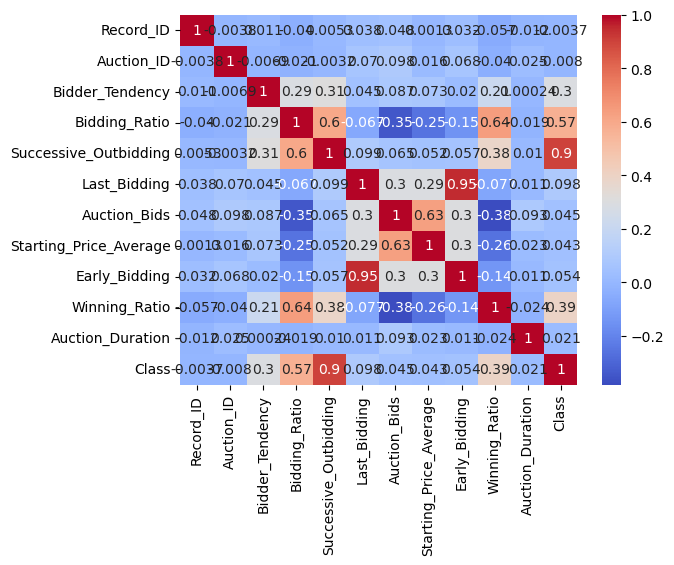

In [5]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [6]:
# Drop one of the variables from the highly correlated pair of variables
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            if colname_i not in highly_correlated and colname_j not in highly_correlated:
                print(f"{colname_i} and {colname_j} are highly correlated ({corr_matrix.iloc[i, j]:.2f})")
                df.drop(colname_i, axis=1, inplace=True)
                highly_correlated.add(colname_i)

Successive_Outbidding and Bidding_Ratio are highly correlated (0.60)
Starting_Price_Average and Auction_Bids are highly correlated (0.63)
Early_Bidding and Last_Bidding are highly correlated (0.95)
Winning_Ratio and Bidding_Ratio are highly correlated (0.64)
Class and Bidding_Ratio are highly correlated (0.57)


### Correlation Variable Selection

##### Bidding_Ratio, Successive_Outbidding, Last_Bidding, Auction_Bids, Starting_Price_Average, Early_Bidding, Winning Ratio

In [7]:
data=pd.read_csv("Group_2_data_cleaned.csv")
data=pd.DataFrame(data)
X=np.array(data.iloc[0:,3:12])
Y=np.array(data.iloc[0:,12:])
LE=LabelEncoder()
X[:,0]=LE.fit_transform(X[:,0]) #Select labels from variables
#Split train and test data. Test data size is 50%, training set is 50%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42) 
#The data set is normalized or 'standardized' for a better performaing KNN for both train and test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Variable Selection
X_train_VS=X_train[0:,1:7]
y_train_VS=y_train
X_test_VS=X_test[0:,1:7]
y_test_VS=y_test

### Best Model Part 2 (SVM LINEAR)

In [9]:
model = LinearSVC(penalty='l2', dual=False, max_iter=10000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [10]:
start_time = time.time()
# Set up k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Set up GridSearchCV to perform model selection using k-fold cross-validation
clf = GridSearchCV(model, param_grid=param_grid, cv=kfold)
clf.fit(X_train, y_train)
end_time = time.time()
duration1=end_time-start_time
# Get the best model
best_model = clf.best_estimator_
print(f"Best model: {best_model}")

Best model: LinearSVC(C=0.01, dual=False, max_iter=10000)


In [11]:
# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_pred,y_test),'\n')
print(f"Accuracy: {round(accuracy*100,2)}%")

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2821
           1       0.83      0.95      0.89       340

    accuracy                           0.97      3161
   macro avg       0.91      0.96      0.94      3161
weighted avg       0.98      0.97      0.98      3161

Confusion Matrix:
 [[2757   17]
 [  64  323]] 

Accuracy: 97.44%


### Best Model Part 3 (SVM Non-Linear)

In [12]:
# SVM Nonlinear

# Set up the pipeline
svm_pipe = make_pipeline(StandardScaler(), SVC())

# Set up the grid search
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['poly', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}
clf = GridSearchCV(svm_pipe, param_grid, cv=5)
# Fit the model and time it
clf.fit(X_train_VS, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['poly', 'rbf', 'sigmoid']})

In [13]:
#Print the best parameters and the time taken to fit the model
print('Best parameters:', clf.best_params_)

Best parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [14]:
# Use the best parameters to fit a new SVM model
best_params = clf.best_params_
svm_pipe = make_pipeline(StandardScaler(), SVC(C=best_params['svc__C'], kernel=best_params['svc__kernel'], gamma=best_params['svc__gamma']))
start_time = time.time()
svm_pipe.fit(X_train_VS, y_train)
end_time = time.time()
print(f"Model Fitting Time: {end_time - start_time}")

Model Fitting Time: 0.02330780029296875


In [15]:
y_pred = svm_pipe.predict(X_test_VS)
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_pred,y_test),'\n')
print('Accuracy:', round(accuracy_score(y_pred,y_test)*100,2),'%')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2821
           1       0.84      0.97      0.90       340

    accuracy                           0.98      3161
   macro avg       0.92      0.98      0.95      3161
weighted avg       0.98      0.98      0.98      3161

Confusion Matrix:
 [[2759    9]
 [  62  331]] 

Accuracy: 97.75 %
